In [1]:
import csv
import os
import numpy as np

import matplotlib.pyplot as plt

In [2]:
folder = "data/"

file1 = "10hz.csv"

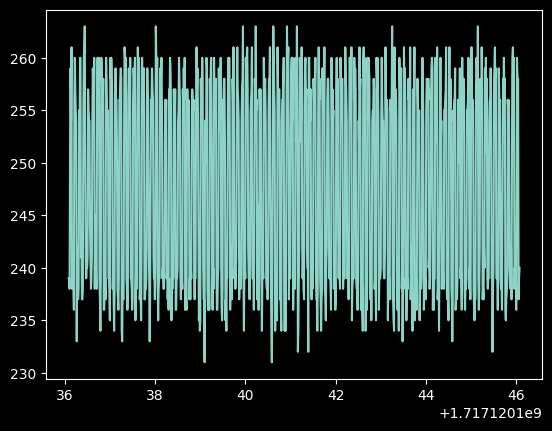

In [3]:
times = []
vals = []

with open(folder+file1, "r") as file:
    for line in file:
        l = line.strip()
        s = l.split(",")
        times.append(float(s[0]))
        vals.append(float(s[1]))

plt.plot(times, vals)

In [25]:
t_diffs = []
for i, t in enumerate(times[:-1]):
    t_diffs.append(times[i+1] - t)

np.mean(t_diffs) # seconds

0.15051775130014572

In [17]:
os.getcwd()

'/Users/tomaitagaki/Documents/GitHub/PowerDelivery/experiments/laser_comm'